# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import matplotlib.pyplot as plt 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
colnames = ['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Class']
df1 = pd.read_csv('pima-indians-diabetes-1.data', names = colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
print(df1.sample(n=10))

     Pregnancies  Glucose  BP  SkinThickness  Insulin   BMI  Pedigree  Age  \
328            2      102  86             36      120  45.5     0.127   23   
741            3      102  44             20       94  30.8     0.400   26   
190            3      111  62              0        0  22.6     0.142   21   
246           10      122  68              0        0  31.2     0.258   41   
492            4       99  68             38        0  32.8     0.145   33   
71             5      139  64             35      140  28.6     0.411   26   
459            9      134  74             33       60  25.9     0.460   81   
222            7      119   0              0        0  25.2     0.209   37   
550            1      116  70             28        0  27.4     0.204   21   
211            0      147  85             54        0  42.8     0.375   24   

     Class  
328      1  
741      0  
190      0  
246      0  
492      0  
71       0  
459      0  
222      0  
550      0  
211      0 

# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
print(df1.dtypes)

Pregnancies        int64
Glucose            int64
BP                 int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Class              int64
dtype: object


In [5]:
print(df1.shape)

(768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [6]:
# From the sample data, we can see that there are 0s in the BP, SkinThickness & Insulin columns, which can't be right. 
# Based on the sample rows, and the information in each of the columns, we should also consider the Glucose and BMI columns.
#We need to replace the 0 values to ensure we can further work with the dataset

# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [7]:
#Before replacing zeroes, also checking if there any missing data in the dataset
df1.isna().sum()

Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

In [8]:
# Replacing 0s with median in Glucose, BP, SkinThickness, BMI & Insulin Columns
df1['Glucose'].replace(0, df1['Glucose'].median)
df1['BP'].replace(0, df1['BP'].median)
df1['SkinThickness'].replace(0, df1['SkinThickness'].median)
df1['BMI'].replace(0, df1['BMI'].median)
df1['Insulin'].replace(0, df1['Insulin'].median)

0      <bound method Series.median of 0        0\n1  ...
1      <bound method Series.median of 0        0\n1  ...
2      <bound method Series.median of 0        0\n1  ...
3                                                     94
4                                                    168
5      <bound method Series.median of 0        0\n1  ...
6                                                     88
7      <bound method Series.median of 0        0\n1  ...
8                                                    543
9      <bound method Series.median of 0        0\n1  ...
10     <bound method Series.median of 0        0\n1  ...
11     <bound method Series.median of 0        0\n1  ...
12     <bound method Series.median of 0        0\n1  ...
13                                                   846
14                                                   175
15     <bound method Series.median of 0        0\n1  ...
16                                                   230
17     <bound method Series.med

# Q5 Print the descriptive statistics of each & every column using describe() function

In [9]:
df1.describe ()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#df1.describe (include='all')

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

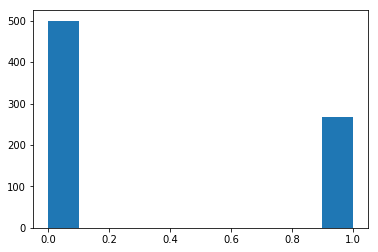

In [11]:
plt.hist(df1['Class'])

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


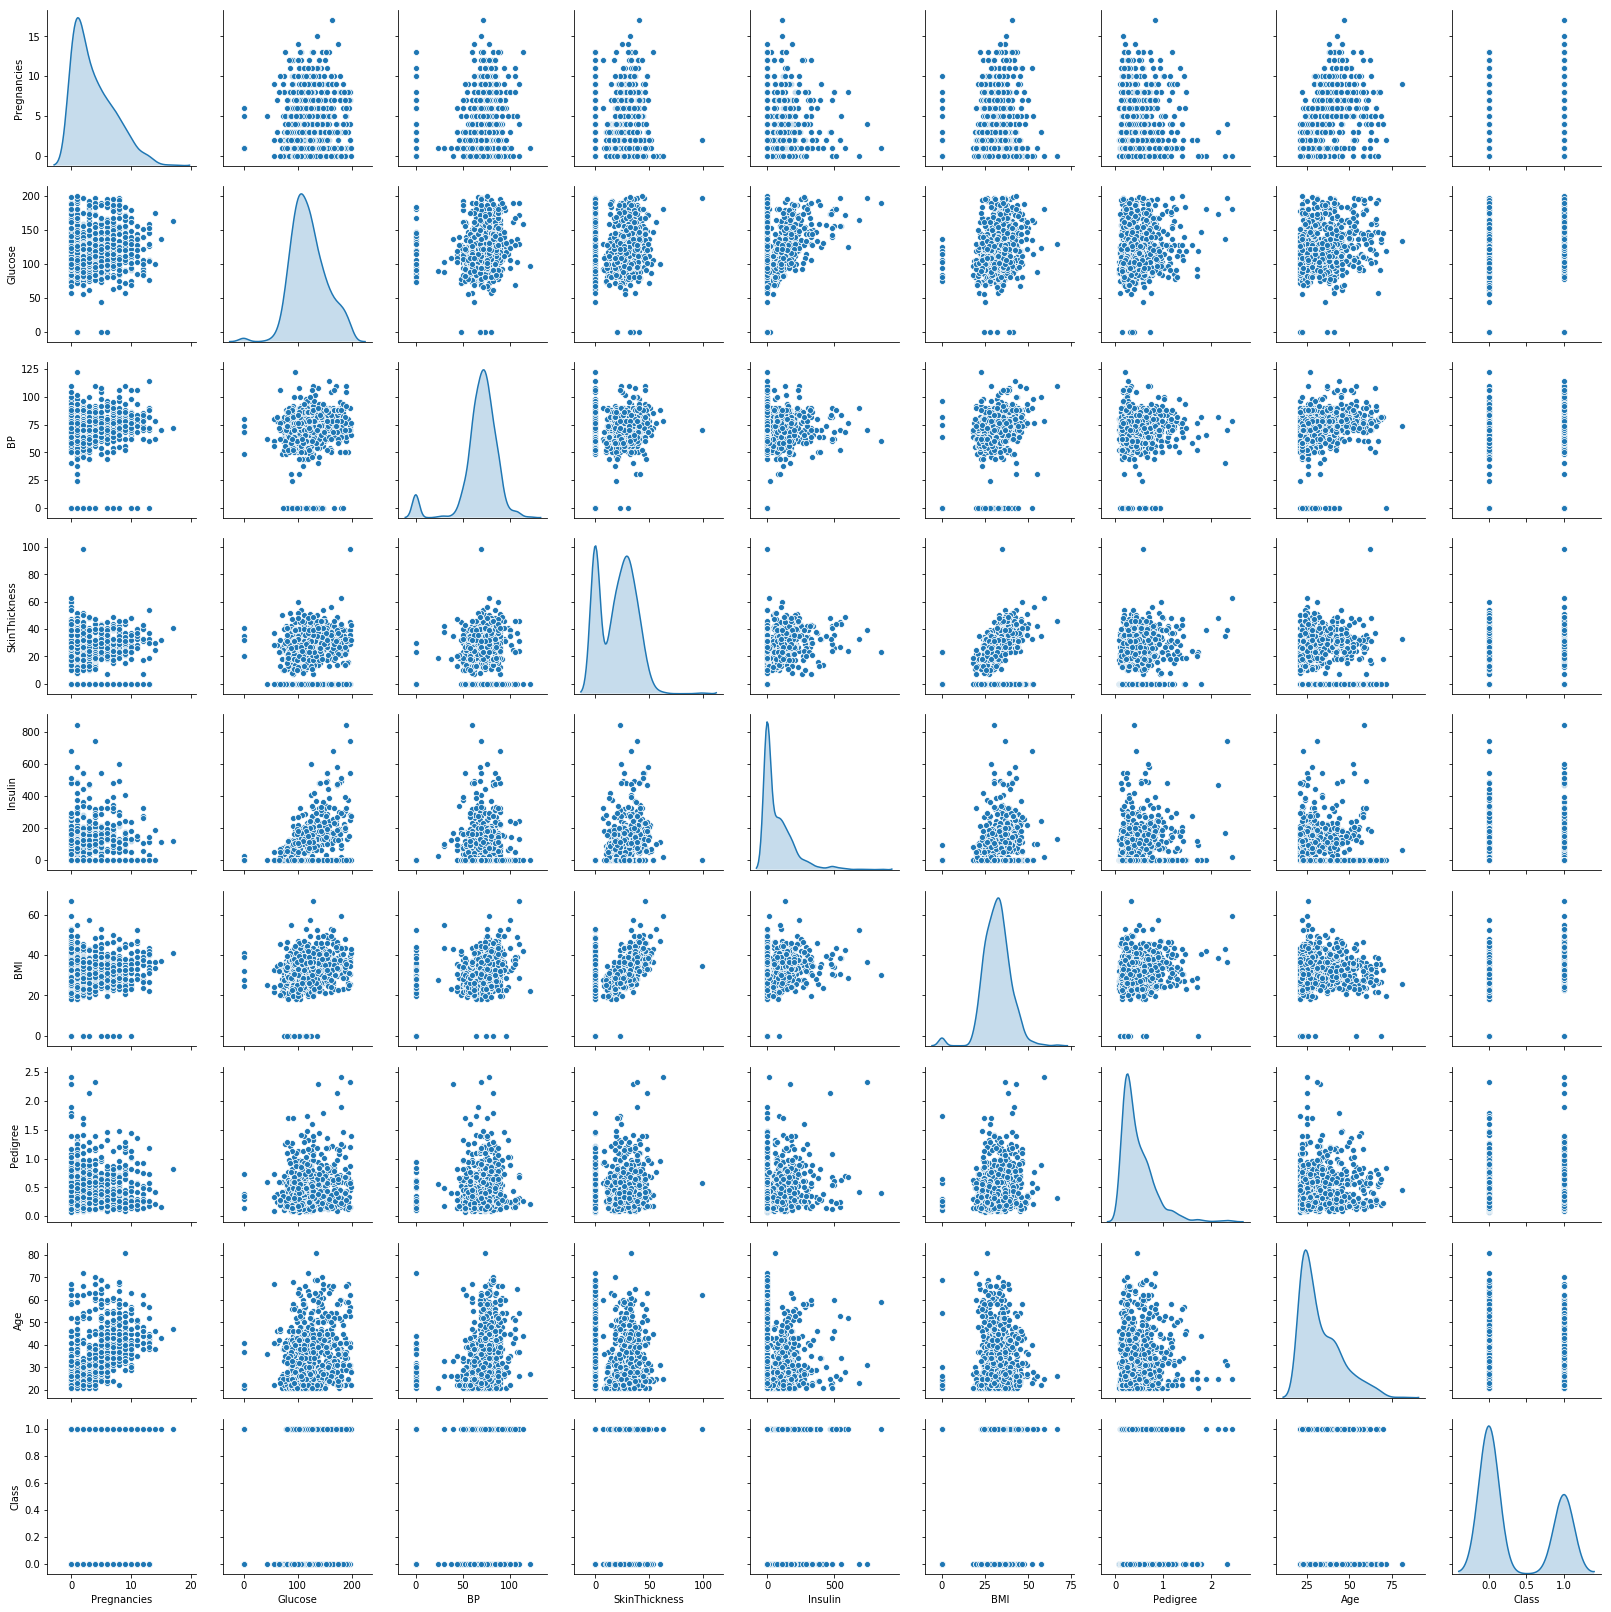

In [12]:
import seaborn as sns
sns.pairplot(df1,diag_kind = 'kde')

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [13]:
X = df1.drop("Class", axis=1)
Y = df1['Class']

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3,random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [15]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' ,random_state=0)
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [16]:
Y_pred_dt=dt_model.predict(X_test)

In [17]:
acc_dt = metrics.accuracy_score(Y_test,Y_pred_dt)
print("The accuracy of the Decision tree is: ",acc_dt)

The accuracy of the Decision tree is:  0.7186147186147186


In [18]:
cm_dt=metrics.confusion_matrix(Y_test,Y_pred_dt)
print("The confusion matrix of the decision tree model is: ", cm_dt)

The confusion matrix of the decision tree model is:  [[113  33]
 [ 32  53]]


Print the feature importance of the decision model - Optional

In [19]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                    Imp
Pregnancies    0.075860
Glucose        0.271467
BP             0.133505
SkinThickness  0.032100
Insulin        0.030702
BMI            0.190016
Pedigree       0.130406
Age            0.135944


# Working on Questions 9 & 10 while defining the max_depth of the Decision Tree to 5

In [20]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=0)
dt_model2.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [21]:
Y_pred2=dt_model2.predict(X_test)

In [22]:
acc_dt2 = metrics.accuracy_score(Y_test,Y_pred2)
print("The accuracy of the Decision tree with max depth 5 is: ",acc_dt2)

The accuracy of the Decision tree with max depth 5 is:  0.7662337662337663


In [23]:
cm_dt2=metrics.confusion_matrix(Y_test,Y_pred2)
print("The confusion matrix of the decision tree model with max depth 5 is: ", cm_dt2)

The confusion matrix of the decision tree model with max depth 5 is:  [[121  25]
 [ 29  56]]


In [24]:
print (pd.DataFrame(dt_model2.feature_importances_, columns = ["Imp"], index = X_train.columns))

                    Imp
Pregnancies    0.054277
Glucose        0.423275
BP             0.035104
SkinThickness  0.014660
Insulin        0.000000
BMI            0.232781
Pedigree       0.088046
Age            0.151858


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [25]:
rf_model = RandomForestClassifier(n_estimators=51,max_depth=5,random_state=0)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

In [26]:
acc_rf = metrics.accuracy_score(Y_test,Y_pred_rf)
print("The accuracy of the Random forest model is: ", acc_rf)

The accuracy of the Random forest model is:  0.7792207792207793


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [33]:
#Using logistic Regression model as the base input for ensembling
lr_model=LogisticRegression()

from sklearn.ensemble import AdaBoostClassifier

abcl_model = AdaBoostClassifier(base_estimator=lr_model,n_estimators=51)
abcl_model.fit(X_train,Y_train)
Y_pred_abcl = abcl_model.predict(X_test)

In [34]:
acc_abcl = metrics.accuracy_score(Y_test,Y_pred_abcl)
print("The accuracy of the Adaboost Ensemble model is: ", acc_abcl)

The accuracy of the Adaboost Ensemble model is:  0.7186147186147186


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [36]:
#Using logistic Regression model as the base input for ensembling
from sklearn.ensemble import BaggingClassifier

bgcl_model = BaggingClassifier(base_estimator=lr_model,n_estimators=51,oob_score=True)
bgcl_model.fit(X_train,Y_train)
Y_pred_bgcl = bgcl_model.predict(X_test)

In [38]:
acc_bgcl = metrics.accuracy_score(Y_test, Y_pred_bgcl)
print("The accuracy of the Bagging Classifier model is: ", acc_bgcl)

The accuracy of the Bagging Classifier model is:  0.7748917748917749


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [41]:
#Using logistic Regression model as the base input for ensembling
from sklearn.ensemble import GradientBoostingClassifier

gbcl_model = GradientBoostingClassifier(n_estimators=51)
gbcl_model.fit(X_train,Y_train)
Y_pred_gbcl = gbcl_model.predict(X_test)

In [43]:
acc_gbcl = metrics.accuracy_score(Y_test, Y_pred_gbcl)
print("The accuracy of the GradientBoost Classifier model is: ", acc_gbcl)

The accuracy of the GradientBoost Classifier model is:  0.8138528138528138


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.